In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Jerk-minimizing Trajectory Generator

In [61]:
def generateJMT(x0, x0_d, x0_dd, xf, xf_d, xf_dd, t):
    t2 =  t*t
    t3 = t2*t
    t4 = t3*t
    t5 = t4*t
    
    A = np.array([[    t3,     t4,      t5],
                  [3.0*t2, 4.0*t3,  5.0*t4,],
                  [6.0*t, 12.0*t2, 20.0*t3]])
    b = np.array([[xf - (x0 + x0_d*t + 0.5*x0_dd*t2)],
                  [xf_d - (x0_d + x0_dd*t)],
                  [xf_dd - (x0_dd)]])
                  
    a3a4a5 = np.linalg.solve(A, b)
                  
    coeffs = [x0, x0_d, 0.5*x0_dd, a3a4a5[0], a3a4a5[1], a3a4a5[2]]
    
    return coeffs

In [62]:
def evaluate_polynomial(coeffs, x):
    output = 0.0
    
    for i in range(len(coeffs)):
        output += coeffs[i] * (x**i)
    return output

In [63]:
def differentiate_polynomial(coeffs):
    output = []
    
    for i in range(1, len(coeffs)):
        output.append(coeffs[i] * i)
        
    return output

In [64]:
def visualize_polynomial(coeffs, t, N):
    x = np.linspace(0, t, N)
    y = [evaluate_polynomial(coeffs, x_i) for x_i in x]
    
    plt.plot(x, y)

### Example

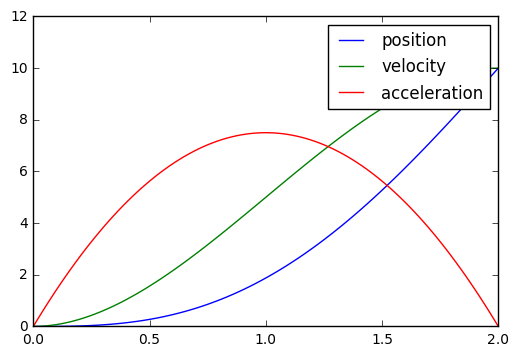

In [65]:
x0 = 0.0
x0_d = 0.0
x0_dd = 0.0

xf = 10.0
xf_d = 10.0
xf_dd = 0.0

t = 2

coeffs_position = generateJMT(x0, x0_d, x0_dd, xf, xf_d, xf_dd, t)
coeffs_velocity = differentiate_polynomial(coeffs_position)
coeffs_acc = differentiate_polynomial(coeffs_velocity)

plt.figure()

visualize_polynomial(coeffs_position, t, 100)
visualize_polynomial(coeffs_velocity, t, 100)
visualize_polynomial(coeffs_acc, t, 100)

plt.legend(['position', 'velocity', 'acceleration'])
plt.show()